# Arctic 2022 Drifter Deployment Plan

We plan to deploy several SVP drifters sent from NOAA/MeteoFrance on an ice-breaking mission

## Goals
* Create an inventory of drifter data in the Arctic
* SUpport operational ocean forecasting by transmitting data to GTS
* Deployments in Hudson Strait and Baffin Bay



## Drifter Inventory 
| Name    | Type    | Quantity  | Data collected             |
|---------|---------|-----------|----------------------------|
| iSVP    | Drogued | 10        | Position/Temperature       |

## Deployment locations

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import xarray as xr

%matplotlib inline

## Hudson Strait

In [2]:
lat_min=60
lon_min=-70
lat_max=63
lon_max=-60

In [3]:
# Glorys climatology
f='/ocean/handres/glorys12/Allvars_glorys12_1993-2018_daily09.nc'
d = xr.open_dataset(f)
dsel = d.isel(depth=0).sel(latitude=slice(lat_min,lat_max), longitude=slice(lon_min, lon_max)).mean(dim='time')
uvel = dsel.uo.values
vvel = dsel.vo.values
lat = dsel.latitude.values
lon = dsel.longitude.values
lon, lat = np.meshgrid(lon, lat)

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [4]:
# etopo file
ef = '/home/soontiensn/data/ocn-nav/ETOPO1_Bed_g_gmt4.grd'
etopo = xr.open_dataset(ef)
esel = etopo.sel(x=slice(lon_min, lon_max), y=slice(lat_min, lat_max))

In [5]:
def plot_map(ax,step=1):
    bmap = Basemap(projection='merc',llcrnrlon=lon_min, urcrnrlon=lon_max,
                   llcrnrlat=lat_min,urcrnrlat=lat_max, ax=ax,resolution='i')
    bmap.drawcoastlines()
    bmap.fillcontinents(color='grey',)
    bmap.drawparallels(np.arange(lat_min, lat_max, step),labels=[1,0,0,1])
    bmap.drawmeridians(np.arange(lon_min, lon_max,step),labels=[0,0,0,1])
    return bmap

In [6]:
def plot_quivers(bmap, ax, xvel,yvel,lat,lon,st=10):
    mag = np.sqrt(xvel**2+yvel**2)
    mesh=bmap.pcolormesh(lon,lat,mag,latlon=True,vmin=0,vmax=1,cmap='YlGnBu_r')
    q=bmap.quiver(lon[::st,::st],lat[::st,::st],xvel[::st,::st],yvel[::st,::st],latlon=True,scale=10,color='lightgrey')
    ax.quiverkey(q,0.05,0.2,0.5,'0.5 m/s',color='lightgrey')
    cbar=plt.colorbar(mesh, ax=ax)
    cbar.set_label('speed [m/s]')

In [7]:
def plot_transects(bmap,ax,transects):
    for transect in transects:
        lons = np.array([transects[transect]['start'][0],
                         transects[transect]['end'][0]])
        lats = np.array([transects[transect]['start'][1],
                         transects[transect]['end'][1]])
        x,y = bmap(lons, lats)
        bmap.plot(x,y,'-r')

In [8]:
def plot_stations(bmap,ax,stations):
    for station in stations:
        lon = stations[station][0]
        lat = stations[station][1]
        x,y = bmap(lon, lat)
        if 'FC' in station:
            marker='o'
        else:
            marker = 's'
        bmap.plot(x,y,marker, label=station)

In [9]:
def plot_bathymetry(bmap, ax, etopo):
    lons = etopo.x.values
    lats = etopo.y.values
    lons, lats = np.meshgrid(lons,lats)
    x, y = bmap(lons, lats)
    bathy = etopo.z.values
    levels = [-500, -100,]
    CS = bmap.contour(x,y,bathy,levels, linestyles='solid', linewidth=0.1,colors='black')
    ax.clabel(CS, CS.levels, inline=True, fmt='%1.0f', fontsize=12)

In [10]:
#transects = {
#    'FC': {'start':[ -52.8316666666667, 47],
#           'end': [-42, 47]},
#    'SEGB': {'start': [-52.9333333333333, 46.5833333333333],
#             'end': [-48.6666666666667, 41.3333333333333]}
#}
stations = {
    'HS-01': [-65, 60.8],
    'HS-02': [-65, 60.9],
    'HS-03': [-65, 61],
    'HS-04': [-65, 61.1],
    'HS-05': [-65, 61.2],
}

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: The following kwargs were not used by contour: 'linewidth'
  


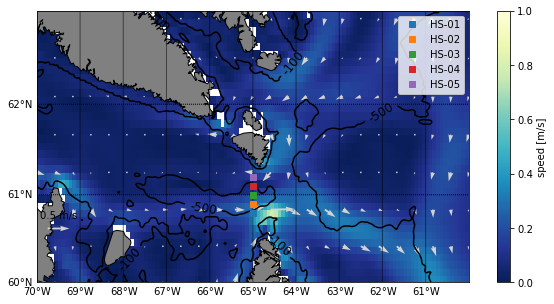

In [11]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
bmap = plot_map(ax)
plot_quivers(bmap, ax,uvel,vvel,lat, lon,st=5)
#plot_transects(bmap, ax, transects)
plot_stations(bmap, ax, stations)
plot_bathymetry(bmap, ax, esel)
#ax.text(0.4,0.4, 'FC', fontsize=12,color='w', transform=ax.transAxes)
#ax.text(0.3,0.33, 'SEGB', fontsize=12,color='w', transform=ax.transAxes)
#ax.set_title('November climatological currents from GLORY12')
ax.legend()

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: The following kwargs were not used by contour: 'linewidth'
  


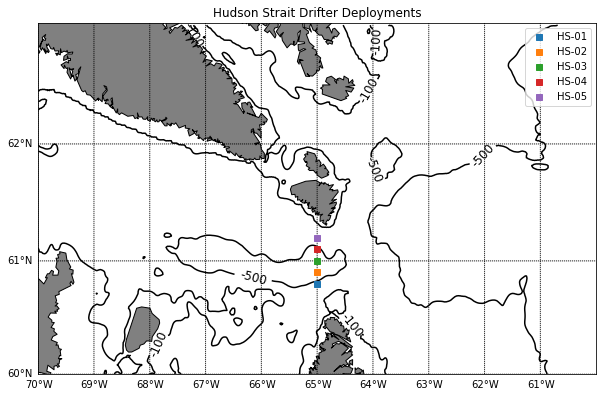

In [12]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
bmap = plot_map(ax)
#plot_transects(bmap, ax, transects)
plot_stations(bmap, ax, stations)
plot_bathymetry(bmap, ax, esel)
ax.set_title('Hudson Strait Drifter Deployments')
ax.legend()

## Baffin Bay

In [13]:
lat_min=60
lon_min=-70
lat_max=70
lon_max=-50

In [14]:
# Glorys climatology
f='/ocean/handres/glorys12/Allvars_glorys12_1993-2018_daily09.nc'
d = xr.open_dataset(f)
dsel = d.isel(depth=0).sel(latitude=slice(lat_min,lat_max), longitude=slice(lon_min, lon_max)).mean(dim='time')
uvel = dsel.uo.values
vvel = dsel.vo.values
lat = dsel.latitude.values
lon = dsel.longitude.values
lon, lat = np.meshgrid(lon, lat)

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [15]:
# etopo file
ef = '/home/soontiensn/data/ocn-nav/ETOPO1_Bed_g_gmt4.grd'
etopo = xr.open_dataset(ef)
esel = etopo.sel(x=slice(lon_min, lon_max), y=slice(lat_min, lat_max))

In [19]:
stations = {
    'BB-01': [-60, 66],
    'BB-02': [-59.5, 66],
    'BB-03': [-59, 66],
    'BB-04': [-58.5, 66],
    'BB-05': [-58, 66],
}

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: The following kwargs were not used by contour: 'linewidth'
  


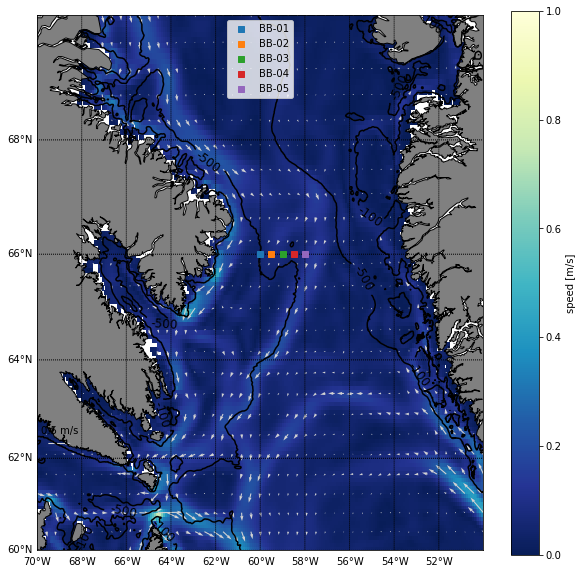

In [20]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
bmap = plot_map(ax,step=2)
plot_quivers(bmap, ax,uvel,vvel,lat, lon,st=5)
#plot_transects(bmap, ax, transects)
plot_stations(bmap, ax, stations)
plot_bathymetry(bmap, ax, esel)
#ax.text(0.4,0.4, 'FC', fontsize=12,color='w', transform=ax.transAxes)
#ax.text(0.3,0.33, 'SEGB', fontsize=12,color='w', transform=ax.transAxes)
#ax.set_title('November climatological currents from GLORY12')
ax.legend()

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: The following kwargs were not used by contour: 'linewidth'
  


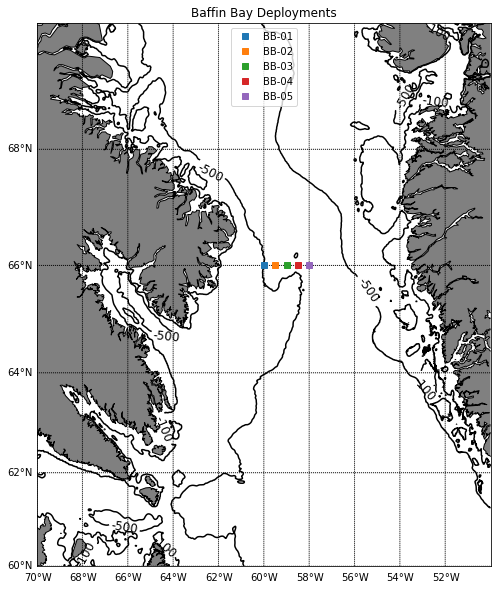

In [21]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
bmap = plot_map(ax,step=2)
#plot_transects(bmap, ax, transects)
plot_stations(bmap, ax, stations)
plot_bathymetry(bmap, ax, esel)
#ax.text(0.4,0.4, 'FC', fontsize=12,color='w', transform=ax.transAxes)
#ax.text(0.3,0.33, 'SEGB', fontsize=12,color='w', transform=ax.transAxes)
ax.set_title('Baffin Bay Deployments')
ax.legend()